In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

### Load a file from the 201905 hindcast

In [2]:
f1=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_yearlymean_2007_2019_ptrc_T.nc')

In [3]:
print(f1.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [4]:
# return times as datetime objects:
torig=dt.datetime.strptime(f1.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f1.variables['time_centered'][:]])

1900-01-01 00:00:00


### Thalweg plot
  method using contour_thalweg from visualisations.py in tools repo

In [5]:
#open bathy file and meshmask
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

Text(0.5, 0.98, 'Mesozooplankton Biomass')

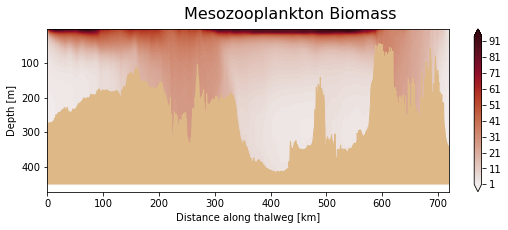

In [6]:
il=0
fig,ax=plt.subplots(1,1,figsize=(9,3))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 1.5, 0.5)
cb=visualisations.contour_thalweg(ax,f1.variables['mesozooplankton'][il,...]*5.7*12,fbathy,fmesh,clevels=100,cmap=cmocean.cm.amp)

fig.suptitle('Mesozooplankton Biomass', fontsize=16)
#plt.savefig('MesozoopThalweg.jpg', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 0.98, 'Microzooplankton Biomass')

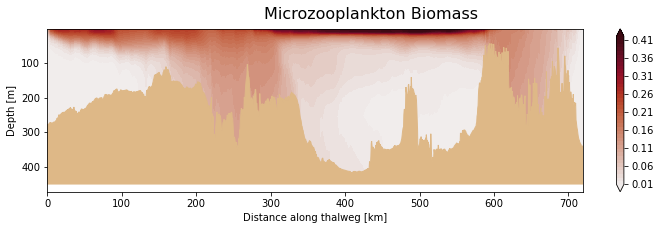

In [7]:
il=0
fig,ax=plt.subplots(1,1,figsize=(12,3))
#fig.title('Mesozooplankton Biomass')
cb=visualisations.contour_thalweg(ax,f1.variables['microzooplankton'][il,...],fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)

fig.suptitle('Microzooplankton Biomass', fontsize=16)


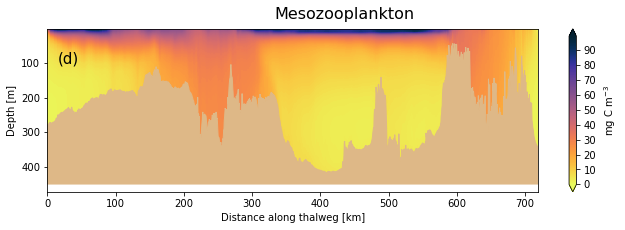

In [10]:
il=0
fig,ax=plt.subplots(1,1,figsize=(11,3))
#fig.title('Mesozooplankton Biomass')
levels = np.arange(0, 100, 0.5)


cb=visualisations.contour_thalweg(ax,f1.variables['mesozooplankton'][il,...]*5.7*12,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.thermal_r)
cb.set_label('mg C m$^{-3}$', rotation=90,labelpad=6)

fig.suptitle('Mesozooplankton', fontsize=16)
ax.text(15, 100, '(d)', fontsize=15,  color='k')
plt.savefig('MesozoopThalweg_Fig6d.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 0.98, 'Microzooplankton')

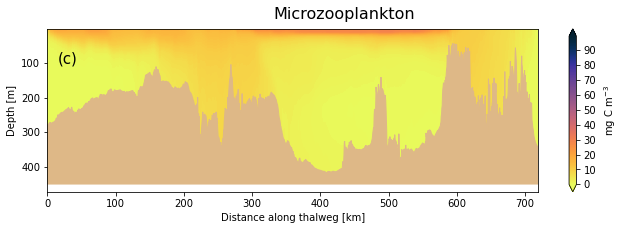

In [11]:
il=0
fig,ax=plt.subplots(1,1,figsize=(11,3))
levels = np.arange(0, 100, 0.5)
cb=visualisations.contour_thalweg(ax,f1.variables['microzooplankton'][il,...]*5.7*12,fbathy,fmesh,clevels=levels,cmap=cmocean.cm.thermal_r)
cb.set_label('mg C m$^{-3}$', rotation=90,labelpad=6)
ax.text(15, 100, '(c)', fontsize=15,  color='k')
fig.suptitle('Microzooplankton', fontsize=16)
#plt.savefig('MicroZoopThalweg_Fig6c.png', bbox_inches='tight',dpi=1000,transparent=False)

Text(0.5, 0.98, 'Diatom Biomass (umol N)')

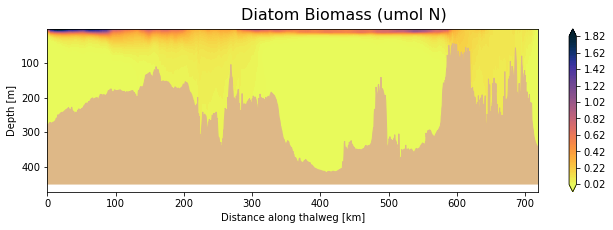

In [12]:
il=0
fig,ax=plt.subplots(1,1,figsize=(11,3))
#levels = np.arange(0, 1, 0.5)
cb=visualisations.contour_thalweg(ax,f1.variables['diatoms'][il,...],fbathy,fmesh,clevels=100,cmap=cmocean.cm.thermal_r)

fig.suptitle('Diatom Biomass (umol N)', fontsize=16)

Text(0.5, 0.98, 'Flagellate Biomass (umol N)')

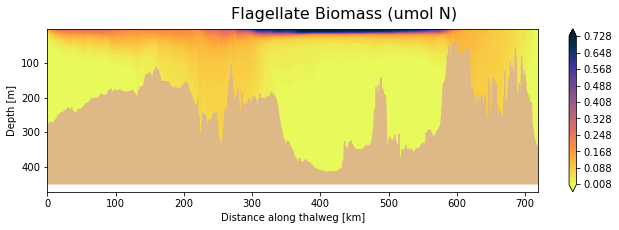

In [13]:
il=0
fig,ax=plt.subplots(1,1,figsize=(11,3))
#levels = np.arange(0, 1, 0.5)
cb=visualisations.contour_thalweg(ax,f1.variables['flagellates'][il,...],fbathy,fmesh,clevels=100,cmap=cmocean.cm.thermal_r)

fig.suptitle('Flagellate Biomass (umol N)', fontsize=16)

In [14]:
f1.close()